<a href="https://colab.research.google.com/github/tamandakaunda-15/HEARTHEAL_GROUP_Application/blob/main/Probability_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BINOMIAL DISTRIBUTION
## Question:
### In the United States, 45% of people have at least one chronic disease
### (such as heart disease, cancer, diabetes, obesity, or hypertension).

### If we randomly select 10 people, what is the probability distribution
### of having 0 to 10 people with a chronic disease?

### We will use the Binomial Distribution to compute and visualize this.
### =======================


In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def binomial_pmf(n, p, k):
    """
    Compute the probability of exactly k successes in n trials using
    the binomial probability mass function.

    Formula: P(X = k) = (nCk) * (p^k) * (1 - p)^(n - k)
    """
    nCk = math.comb(n, k)  # Compute combinations using NumPy
    return nCk * (p ** k) * ((1 - p) ** (n - k))

In [ ]:
# Parameters
n = 10   # Total number of people in the sample
p = 0.45 # Probability of having a chronic disease

# Compute probability for all possible values of k (0 to 10)
x_values = np.arange(0, n + 1)  # Possible values from 0 to 10
y_values = [binomial_pmf(n, p, k) for k in x_values]


In [ ]:
# Print Probability Values
for k, prob in zip(x_values, y_values):
    print(f"P(X = {k}): {prob:.4f}")

P(X = 0): 0.0025
P(X = 1): 0.0207
P(X = 2): 0.0763
P(X = 3): 0.1665
P(X = 4): 0.2384
P(X = 5): 0.2340
P(X = 6): 0.1596
P(X = 7): 0.0746
P(X = 8): 0.0229
P(X = 9): 0.0042
P(X = 10): 0.0003


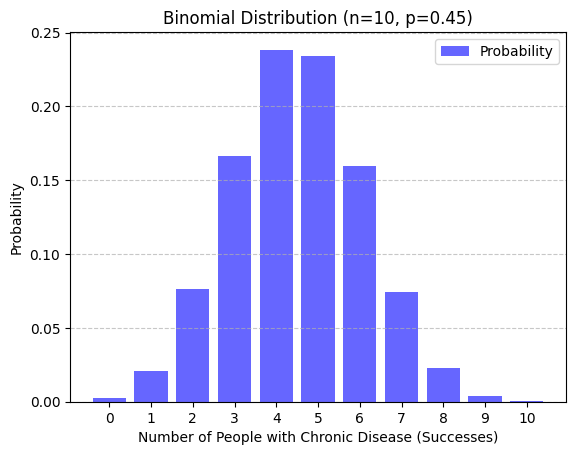

In [ ]:
# Plot the probability using matplotlib
plt.bar(x_values, y_values, color='blue', alpha=0.6, label="Probability")
plt.xlabel("Number of People with Chronic Disease (Successes)")
plt.ylabel("Probability")
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.xticks(x_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Bayesian Probability

You are working on a spam email filter, and you want to determine the probability that an email is spam, given that it contains the word "offer." Based on historical data, you know the following:

##### 20% of emails are spam.
##### 80% of emails are not spam.
##### 90% of spam emails contain the word "offer."
##### 10% of non-spam emails contain the word "offer."
##### Using Bayes' Theorem, calculate the probability that an email is spam if it contains the word "offer."

In [ ]:
# Define prior, likelihood, and false positive rate
P_spam = 0.2  # Prior probability of an email being spam
P_no_spam = 1 - P_spam  # Complement of the prior

P_offer_given_spam = 0.9  # Likelihood: "Offer" in spam email
P_offer_given_no_spam = 0.1  # False positive rate: "Offer" in non-spam email

# Bayes' Theorem to calculate the posterior probability
def bayes_theorem(P_offer_given_spam, P_spam, P_offer_given_no_spam, P_no_spam):
    # Calculate P(Offer)
    P_offer = P_offer_given_spam * P_spam + P_offer_given_no_spam * P_no_spam

    # Apply Bayes' theorem
    P_spam_given_offer = (P_offer_given_spam * P_spam) / P_offer

    return P_spam_given_offer

# Calculate the posterior probability
posterior_spam = bayes_theorem(P_offer_given_spam, P_spam, P_offer_given_no_spam, P_no_spam)

# Print the posterior probability
print(f"Posterior Probability of an email being spam given the word 'offer': {posterior_spam:.4f}")

Posterior Probability of an email being spam given the word 'offer': 0.6923


#Gradient Descent



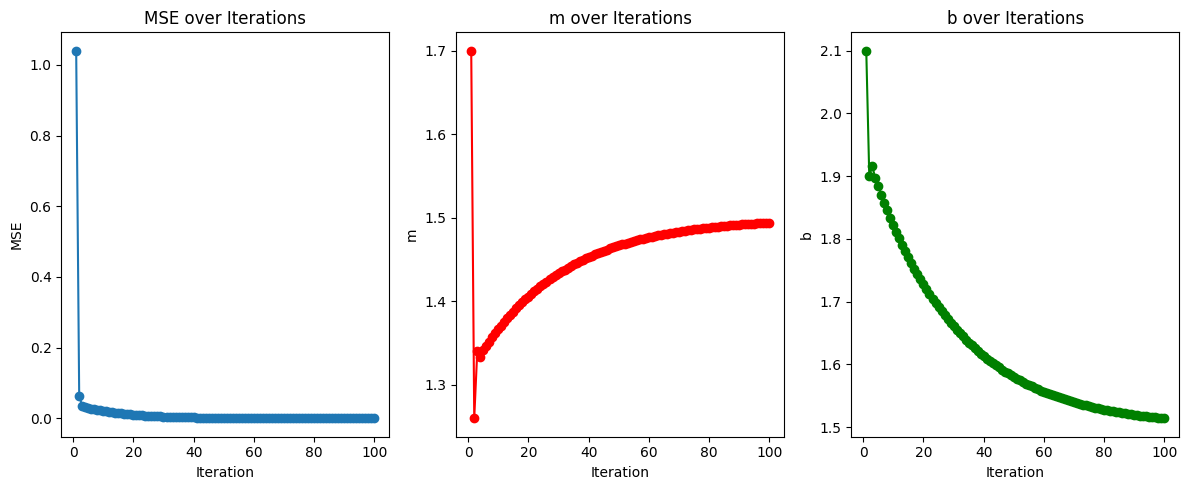

Final m: 1.4942, Final b: 1.5139


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given data points (from document)
X = np.array([1, 3])
Y = np.array([3, 6])

# Mean Squared Error (MSE) function
def mse(params):
    m, b = params
    Y_pred = m * X + b
    return np.mean((Y - Y_pred) ** 2)

# Gradient Descent Implementation
def gradient_descent(X, Y, learning_rate=0.1, max_iterations=100, tolerance=1e-6):
    m, b = -1, 1  # Initial values on per document
    history = []  # To store m, b, and MSE over iterations

    for iteration in range(max_iterations):
        # Compute predictions
        Y_pred = m * X + b

        # Compute gradients
        dm = -2 * np.sum(X * (Y - Y_pred)) / len(X)
        db = -2 * np.sum(Y - Y_pred) / len(X)

        # Update parameters
        m -= learning_rate * dm
        b -= learning_rate * db

        # Compute MSE
        error = mse((m, b))
        history.append((m, b, error))

        # Stopping condition: If parameter updates are very small, stop
        if abs(dm) < tolerance and abs(db) < tolerance:
            break

    return m, b, history

# Run gradient descent
m_final, b_final, history = gradient_descent(X, Y)

# Extract history data for plotting
iterations = np.arange(1, len(history) + 1)
m_values, b_values, errors = zip(*history)

# Plot the parameter updates over iterations
plt.figure(figsize=(12, 5))

# Plot MSE reduction
plt.subplot(1, 3, 1)
plt.plot(iterations, errors, marker='o', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE over Iterations")

# Plot m updates
plt.subplot(1, 3, 2)
plt.plot(iterations, m_values, marker='o', linestyle='-', color='red')
plt.xlabel("Iteration")
plt.ylabel("m")
plt.title("m over Iterations")

# Plot b updates
plt.subplot(1, 3, 3)
plt.plot(iterations, b_values, marker='o', linestyle='-', color='green')
plt.xlabel("Iteration")
plt.ylabel("b")
plt.title("b over Iterations")

plt.tight_layout()
plt.show()

# Print final values (Iterations)
print(f"Final m: {m_final:.4f}, Final b: {b_final:.4f}")
